### Regression MovieLens

This example shows how to use DeepFM to solve a simple binary regression task

In [1]:
import pandas as pd

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from deepctr.models import DeepFM
from deepctr.feature_column import SparseFeat, get_feature_names

In [4]:
data = pd.read_csv("./movielens_sample.txt")
data.info()
data.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     200 non-null    int64 
 1   movie_id    200 non-null    int64 
 2   rating      200 non-null    int64 
 3   timestamp   200 non-null    int64 
 4   title       200 non-null    object
 5   genres      200 non-null    object
 6   gender      200 non-null    object
 7   age         200 non-null    int64 
 8   occupation  200 non-null    int64 
 9   zip         200 non-null    object
dtypes: int64(6), object(4)
memory usage: 15.8+ KB


,user_id,movie_id,rating,timestamp,title,genres,gender,age,occupation,zip
0,3299,235,4,968035345,Ed Wood (1994),Comedy|Drama,F,25,4,19119
1,3630,3256,3,966536874,Patriot Games (1992),Action|Thriller,M,18,4,77005


In [5]:
sparse_features = ["movie_id", "user_id", "gender", "age", "occupation", "zip"]
target = ["rating"]

In [6]:
# label encoding for sparse features and do simple transformation for dense features
for feat in sparse_features:
    lbe = LabelEncoder()
    data[feat] = lbe.fit_transform(data[feat])

fixlen_feature_columns = [SparseFeat(feat, data[feat].max() + 1, embedding_dim=4) for feat in sparse_features]
linear_feature_columns = fixlen_feature_columns
dnn_feature_columns = fixlen_feature_columns

In [7]:
feature_names = get_feature_names(linear_feature_columns + dnn_feature_columns)

In [8]:
# generate input data for model
train, test = train_test_split(data, test_size=0.2, random_state=43)
train_model_input = {name: train[name].values for name in feature_names}
test_model_input = {name: test[name].values for name in feature_names}

In [10]:
train_model_input["movie_id"]

array([ 99, 165, 153, 168,  19,  63,  90,  91, 142,  95, 137, 143, 114,
        72,  71, 174,  40,  84, 130,  96,  76,  69,  54, 136,  35, 123,
       158, 178,  23, 129, 122, 134,   5, 104,  55,  68, 115,   3,  86,
        60, 157,  37, 166,  34, 107,  41, 170,   4,  66, 149, 152, 154,
       167, 180, 169, 102,  27,  57, 163, 161, 160,   8,  27,  94, 151,
        20,  45,  74, 121,  98, 128,  30, 108, 146, 126, 119, 124, 139,
       177,  29, 110,  28,  64,  21,  85,  80, 125, 101, 170, 118,  52,
        81, 149, 132,  13,  59,  32,  77,  43,  78, 127,   7,  16, 141,
        87, 184,  88,  18,  39, 164,  66, 156, 100,  73,  89,   1, 111,
        61, 120, 112,  92, 144, 181, 135,  44,  53, 140,  50,  26,   9,
       185,  62, 150, 116, 159,  42,  10,  34, 112,  72,  22, 172,  14,
        48, 182, 117,  15,  56,  51,  38,  35, 186, 155, 126, 109,  46,
        67,  83,  79,   9])

### Define model, train, predict and evaluate

In [31]:
model = DeepFM(linear_feature_columns, dnn_feature_columns, task="regression")
model.compile("adam", "mse", metrics =["mse"])

In [32]:
train[target].value_counts(), type(train[target].values)

(rating
 4         51
 5         41
 3         40
 2         19
 1          9
 dtype: int64,
 numpy.ndarray)

In [33]:
EPOCHS = 40
BATCH_SIZE = 256
history = model.fit(train_model_input, train[target].values, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=2, validation_split=0.2)

Epoch 1/40
1/1 - 1s - loss: 14.0547 - mse: 14.0547 - val_loss: 15.0978 - val_mse: 15.0978
Epoch 2/40
1/1 - 0s - loss: 13.9185 - mse: 13.9185 - val_loss: 14.9558 - val_mse: 14.9558
Epoch 3/40
1/1 - 0s - loss: 13.7611 - mse: 13.7611 - val_loss: 14.7987 - val_mse: 14.7987
Epoch 4/40
1/1 - 0s - loss: 13.5880 - mse: 13.5880 - val_loss: 14.6266 - val_mse: 14.6266
Epoch 5/40
1/1 - 0s - loss: 13.3997 - mse: 13.3997 - val_loss: 14.4378 - val_mse: 14.4378
Epoch 6/40
1/1 - 0s - loss: 13.1934 - mse: 13.1934 - val_loss: 14.2293 - val_mse: 14.2293
Epoch 7/40
1/1 - 0s - loss: 12.9666 - mse: 12.9666 - val_loss: 13.9981 - val_mse: 13.9981
Epoch 8/40
1/1 - 0s - loss: 12.7160 - mse: 12.7160 - val_loss: 13.7417 - val_mse: 13.7417
Epoch 9/40
1/1 - 0s - loss: 12.4384 - mse: 12.4384 - val_loss: 13.4580 - val_mse: 13.4580
Epoch 10/40
1/1 - 0s - loss: 12.1312 - mse: 12.1312 - val_loss: 13.1443 - val_mse: 13.1443
Epoch 11/40
1/1 - 0s - loss: 11.7920 - mse: 11.7920 - val_loss: 12.7984 - val_mse: 12.7984
Epoch 12

In [34]:
pred_ans = model.predict(test_model_input, batch_size=256)
print("test MSE", round(mean_squared_error(
        test[target].values, pred_ans), 4))

test MSE 1.1349


In [38]:
test[target].values

array([[1],
       [5],
       [4],
       [2],
       [3],
       [4],
       [3],
       [5],
       [3],
       [5],
       [2],
       [3],
       [4],
       [3],
       [3],
       [4],
       [4],
       [5],
       [3],
       [4],
       [4],
       [4],
       [5],
       [2],
       [4],
       [3],
       [4],
       [4],
       [3],
       [3],
       [5],
       [4],
       [4],
       [3],
       [3],
       [3],
       [2],
       [5],
       [4],
       [3]])

In [36]:
pred_ans

array([[3.091903 ],
       [3.2551947],
       [3.1218376],
       [3.0268307],
       [2.9982347],
       [3.6026037],
       [3.0194309],
       [3.1049426],
       [3.0579717],
       [2.985485 ],
       [3.5306582],
       [3.087148 ],
       [3.1335251],
       [3.0839965],
       [3.1386285],
       [3.0334926],
       [3.087395 ],
       [3.2018116],
       [3.0740883],
       [3.084114 ],
       [2.9959223],
       [3.261379 ],
       [3.0279977],
       [3.1127465],
       [3.0426586],
       [3.0715559],
       [3.465236 ],
       [3.1366584],
       [3.1626902],
       [2.9694452],
       [3.0927267],
       [3.0142696],
       [3.0801709],
       [3.0147743],
       [2.9956615],
       [3.550962 ],
       [3.02079  ],
       [3.0358372],
       [3.7937279],
       [3.074418 ]], dtype=float32)

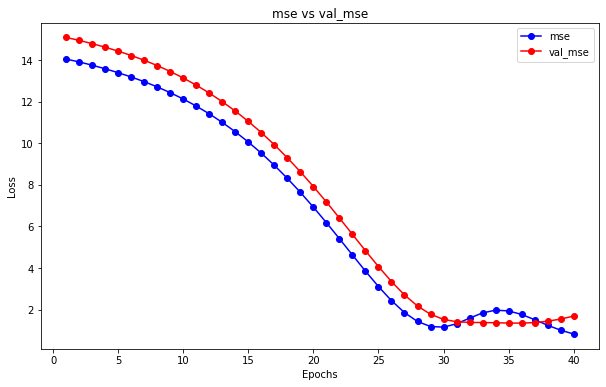

In [35]:
import matplotlib.pyplot as plt
# Extract loss and validation loss values
def plot_history(history, train_metric: str, val_metric: str):
    history_dict = history.history

    loss = history_dict[train_metric]
    val_loss = history_dict[val_metric]
    # Create an array with epoch numbers
    epochs = range(1, len(loss) + 1)

    # Plotting the training and validation loss
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, loss, 'bo-', label=train_metric)
    plt.plot(epochs, val_loss, 'ro-', label=val_metric)
    plt.title(f'{train_metric} vs {val_metric}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_history(history, "mse", "val_mse")